**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [460]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.utils import check_array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [461]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.data = X
        self.label = y
        self.n_classes = np.size(np.unique(y))
        
    def predict(self, X):
        X = check_array(X, accept_sparse='csr')
        if (self.algorithm == 'brute'):
            dist_matrix = pairwise_distances(X, self.data, self.metric)
            dist_closest = np.sort(dist_matrix, axis=1)[:, 0:self.n_neighbors]
            label_closest = self.label[np.argsort(dist_matrix, axis=1)][:, 0:self.n_neighbors]
        elif (self.algorithm == 'kd_tree'):
            tree = KDTree(self.data)
            dist_closest, ind = tree.query(X, k=self.n_neighbors)
            label_closest = self.label[ind]
        return np.hstack(np.apply_along_axis(lambda x: \
                         np.sum((1/(dist_closest+1))*np.equal(label_closest, x).astype(int), axis=1).reshape(-1,1), \
                         1, np.arange(self.n_classes).reshape(-1,1))).argmax(axis=1)            

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [462]:
iris = datasets.load_iris()

In [463]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [464]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [465]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [466]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [467]:
%timeit clf.fit(X_train, y_train)

281 µs ± 8.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [468]:
%timeit my_clf.fit(X_train, y_train)

12.1 µs ± 66.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [469]:
%timeit clf.predict(X_test)

1.33 ms ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [470]:
%timeit my_clf.predict(X_test)

804 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [471]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [472]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [473]:
%timeit clf.fit(X_train, y_train)

444 µs ± 9.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [474]:
%timeit my_clf.fit(X_train, y_train)

12.5 µs ± 77.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [475]:
%timeit clf.predict(X_test)

1.37 ms ± 60.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [476]:
%timeit my_clf.predict(X_test)

543 µs ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [477]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)

assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [478]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [479]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [480]:
vectorizer = CountVectorizer(min_df=0.2, max_df=0.8, max_features=100)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [481]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.split(X)
for train_index, test_index in kf.split(X):
    print("train:", train_index, "test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

train: [ 3772  3773  3774 ... 11311 11312 11313] test: [   0    1    2 ... 3769 3770 3771]
train: [    0     1     2 ... 11311 11312 11313] test: [3772 3773 3774 ... 7540 7541 7542]
train: [   0    1    2 ... 7540 7541 7542] test: [ 7543  7544  7545 ... 11311 11312 11313]


In [482]:
def opt_KNeighbors(k_min, k_max, X, target, kfolds, metric):
    precision_avg = 0
    precision = [precision_avg]
    for k in np.arange(k_min, k_max+1):
        clf = MyKNeighborsClassifier(k, 'brute', metric=metric)
        precision_avg_new = cross_val_score(clf, X, target, cv=kfolds, scoring = 'precision_macro').mean()
        if (precision_avg_new > precision_avg):
            k_opt = k
            precision_avg = precision_avg_new
        precision.append(precision_avg_new)
    return k_opt, precision

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [483]:
k_min = 1
k_max = 10
vectorizer_new = TfidfVectorizer(min_df=0.2, max_df=0.8, max_features=100)
X_tfidf = vectorizer_new.fit_transform(data)

k_opt_app1, precision_app1 = opt_KNeighbors(k_min, k_max, X, target, kfolds=kf, metric='euclidean')
k_opt_app2, precision_app2 = opt_KNeighbors(k_min, k_max, X, target, kfolds=kf, metric='cosine')
k_opt_app3, precision_app3 = opt_KNeighbors(k_min, k_max, X_tfidf, target, kfolds=kf, metric='euclidean')

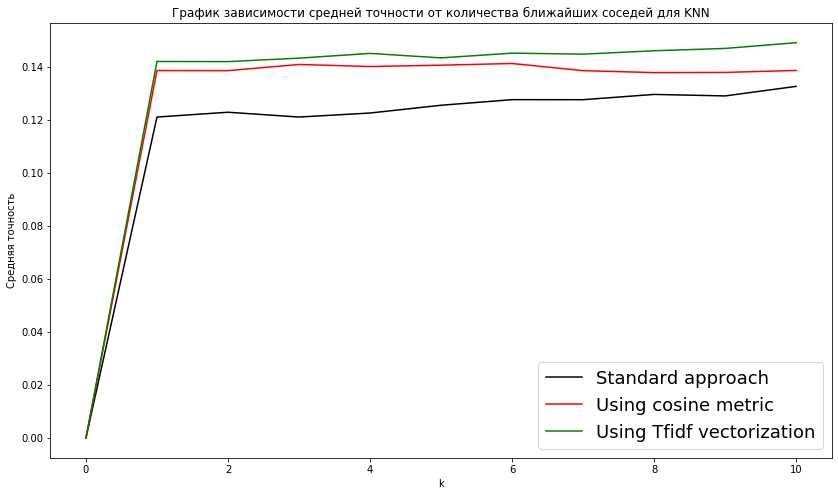

In [484]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_title("График зависимости средней точности от количества ближайших соседей для KNN")
ax.set_xlabel("k")
ax.set_ylabel("Средняя точность")
line1 = ax.plot(precision_app1, color='black', label='Standard approach')
line2 = ax.plot(precision_app2, color='red', label='Using cosine metric')
line3 = ax.plot(precision_app3, color='green', label='Using Tfidf vectorization')
ax.legend(fontsize=18)

In [485]:
k_opt = k_opt_app3
print('Optimal k = ', k_opt, ', precision = ', max(precision_app3), sep='')

Optimal k = 10, precision = 0.14912748555791724


Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [486]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [489]:
data_test = newsgroups['data']
target_test = newsgroups['target']

vectorizer_test = TfidfVectorizer(max_features=X.shape[1])
X_test = vectorizer_test.fit_transform(data_test)

clf = MyKNeighborsClassifier(n_neighbors=k_opt, algorithm='brute', metric='euclidean')
clf.fit(X, target)
target_pred = clf.predict(X_test)

In [490]:
precisioncv = cross_val_score(clf, X_test, target_test, cv=kf, scoring = 'precision_macro').mean()

print('Precision with no CV: ', accuracy_score(target_pred, target_test), '\nPrecision with CV: ', \
      precisioncv, '\nAbsolute difference: ', abs(accuracy_score(target_pred, target_test) - precisioncv),\
         sep = '')

Precision with no CV: 0.05483271375464684
Precision with CV: 0.15204030716761777
Absolute difference: 0.09720759341297092


Возможно, отличие в качестве происходит из-за того, что улучшена обобщающая способность с завязкой на кросс-валидацию.